In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [3]:
monthly_df = pd.read_csv('monthly_df.csv')
monthly_df.head()

,aet,def,pet,ppt,q,soil,srad,swe,tmax
1990-01-01,21771.336575,21773.394642,21779.298679,1.426419e+09,1.426419e+09,21782.174328,21827.981936,1.426420e+09,21764.808181
1990-01-02,21771.144471,21772.950923,21778.662856,1.426419e+09,1.426419e+09,21782.309110,21817.372051,1.426420e+09,21764.353422
1990-01-03,21772.491551,21775.550217,21782.609230,1.426419e+09,1.426419e+09,21782.211111,21810.947748,1.426420e+09,21764.802737
1990-01-04,21774.322645,21775.911386,21784.801493,1.426419e+09,1.426419e+09,21782.707200,21813.346588,1.426420e+09,21765.294871
1990-01-05,21777.312543,21778.811099,21790.691105,1.426419e+09,1.426419e+09,21782.720816,21818.944024,1.426420e+09,21766.289915


In [4]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1990-01-01 to 2022-01-12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aet     396 non-null    float64
 1   def     384 non-null    float64
 2   pet     384 non-null    float64
 3   ppt     396 non-null    float64
 4   q       396 non-null    float64
 5   soil    396 non-null    float64
 6   srad    396 non-null    float64
 7   swe     384 non-null    float64
 8   tmax    204 non-null    float64
dtypes: float64(9)
memory usage: 30.9+ KB


In [5]:
monthly_df.isna().sum()

aet       0
def      12
pet      12
ppt       0
q         0
soil      0
srad      0
swe      12
tmax    192
dtype: int64

How to include images in Jupyter Notebook:</br>https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

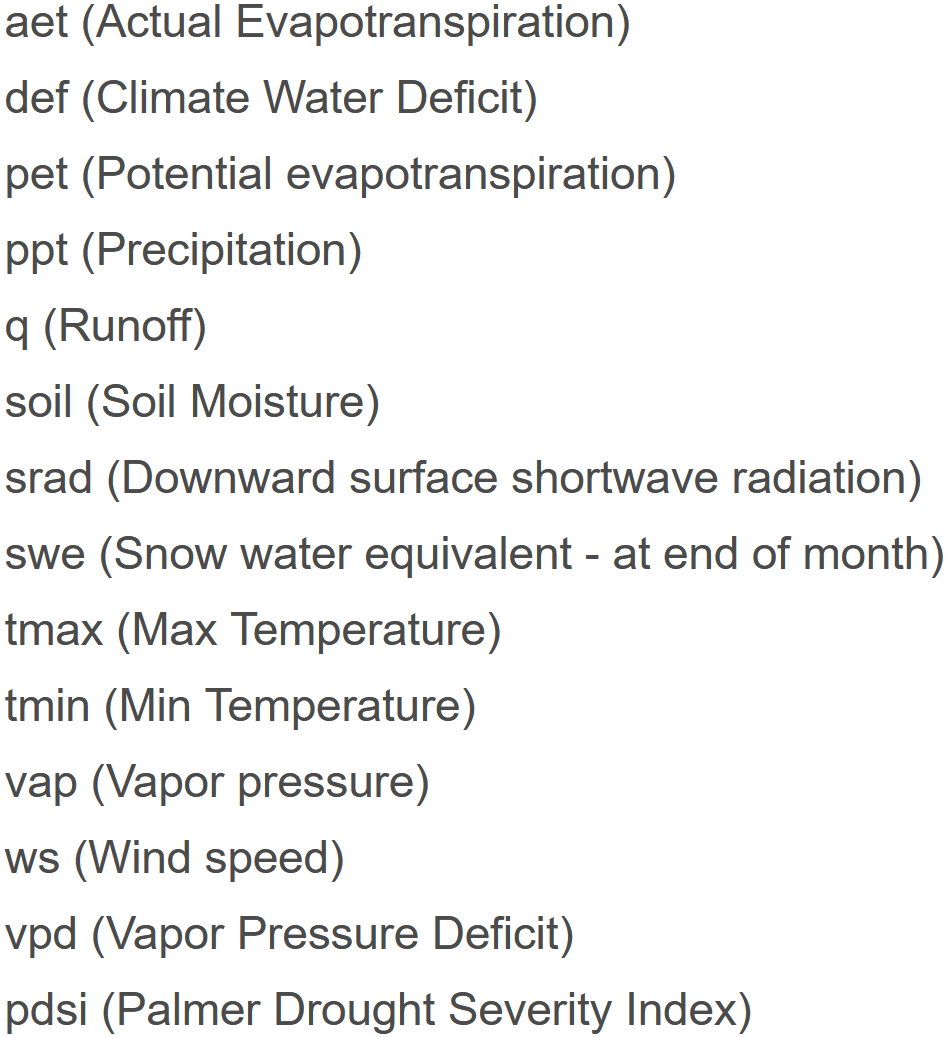

In [6]:
# screenshot via https://www.climatologylab.org/wget-terraclimate.html
Image("../Data/terra_climate_variables.png", embed = True, width = 300)

There's a huge amount of data missing from the `tmax` (max. temperature) feature. Likely, I will have to simply remove it.
`def`, `pet` and `swe` are all missing a year's worth of data. I'm interested to see where in time this data is missing so I can figure out whether to impute forward or backwards.

But first, I want to deal with an anomaly I've noticed in some of the columns:

In [7]:
type(monthly_df['aet'].index)

pandas.core.indexes.base.Index

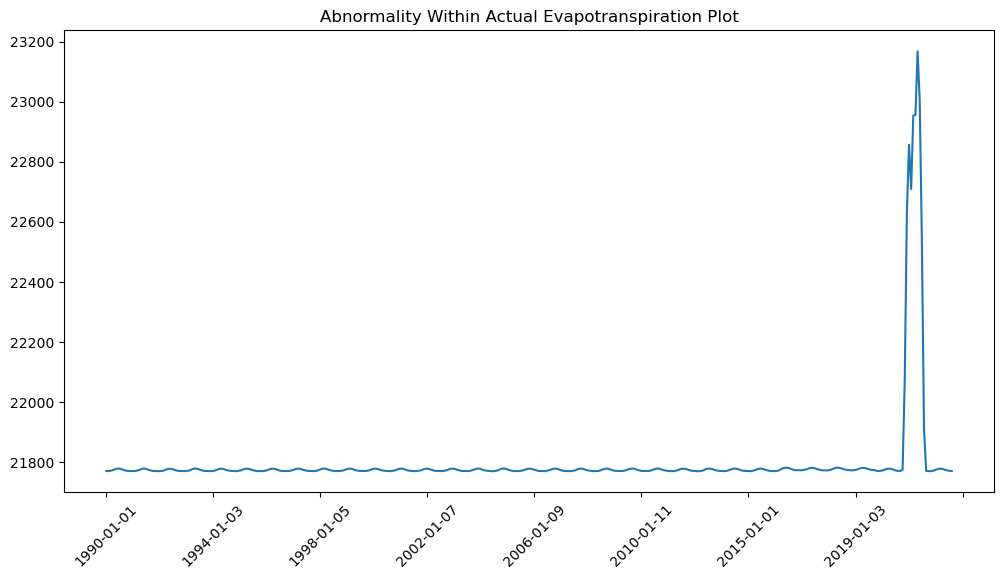

In [8]:
plt.figure(figsize = (12, 6))
monthly_df['aet'].plot()
plt.xticks(rotation = 45);
plt.title('Abnormality Within Actual Evapotranspiration Plot');
# plt.xticks(monthly_df['aet'].index.year)

There is a huge spike within the year 2020, implying that this file's data was corrupted somehow. The divergence from the baseline condition of the AET data is pretty apparent:

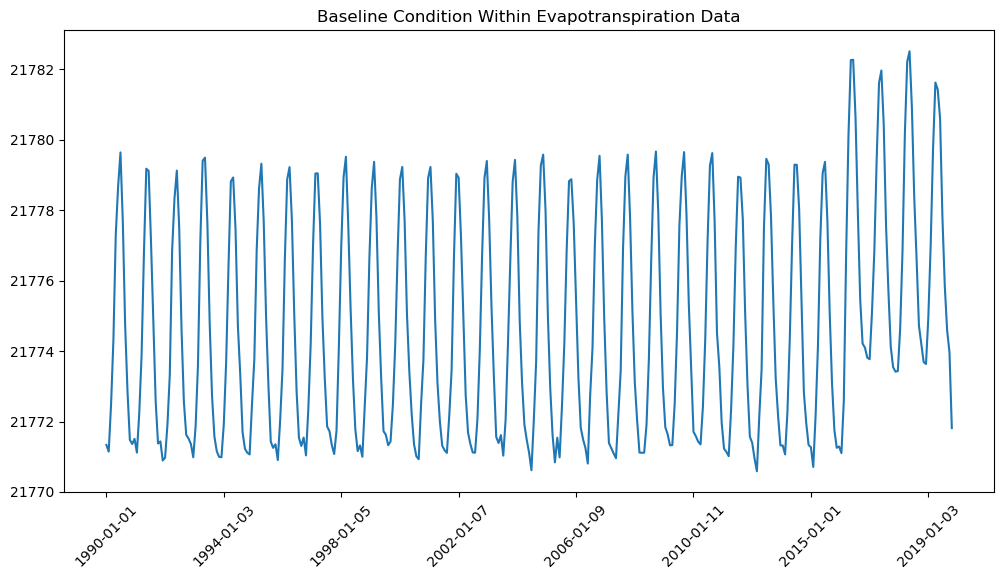

In [9]:
plt.figure(figsize = (12, 6))
monthly_df['aet'].loc[:'2020-01-01'].plot()
plt.xticks(rotation = 45);
plt.title('Baseline Condition Within Evapotranspiration Data');

My best option is to set the affected portion of the timeseries to be np.nan, then impute the missing data using the last observation carried forward method:</br>
Method via https://www.section.io/engineering-education/missing-values-in-time-series/#3-last-observation-carried-forwardlocf


This will use previous observations to impute the missing data. `aet` doesn't have any missing data, so I don't have to worry about whether this will be a valid strategy for existing np.nans (are they in the year 1990, etc.)

In [10]:
# before
monthly_df['aet'].loc['2021-01-01':'2022-01-01']

2021-01-01    21775.699716
2021-01-02    22071.242748
2021-01-03    22630.942824
2021-01-04    22856.863469
2021-01-05    22709.381324
2021-01-06    22954.366867
2021-01-07    22955.514075
2021-01-08    23167.706470
2021-01-09    23004.354506
2021-01-10    22542.385561
2021-01-11    21914.015385
2021-01-12    21771.739992
2022-01-01    21771.391089
Name: aet, dtype: float64

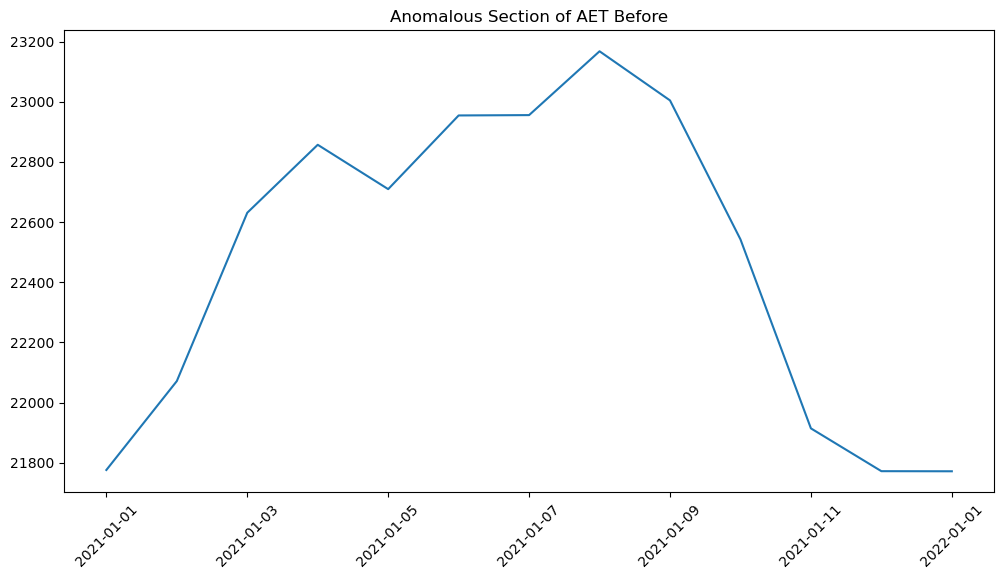

In [11]:
plt.figure(figsize = (12, 6))
monthly_df['aet'].loc['2021-01-01':'2022-01-01'].plot()
plt.xticks(rotation = 45);
plt.title('Anomalous Section of AET Before');

In [12]:
# converting selected area to np.nan
monthly_df['aet'].loc['2021-01-01':'2022-01-01'] = [np.nan for s in monthly_df['aet'].loc['2021-01-01':'2022-01-01']]

In [13]:
# after
monthly_df['aet'].loc['2021-01-01':'2021-12-31']

2021-01-01   NaN
2021-01-02   NaN
2021-01-03   NaN
2021-01-04   NaN
2021-01-05   NaN
2021-01-06   NaN
2021-01-07   NaN
2021-01-08   NaN
2021-01-09   NaN
2021-01-10   NaN
2021-01-11   NaN
2021-01-12   NaN
Name: aet, dtype: float64

In [14]:
monthly_df['aet'] = monthly_df['aet'].fillna(method ='bfill')

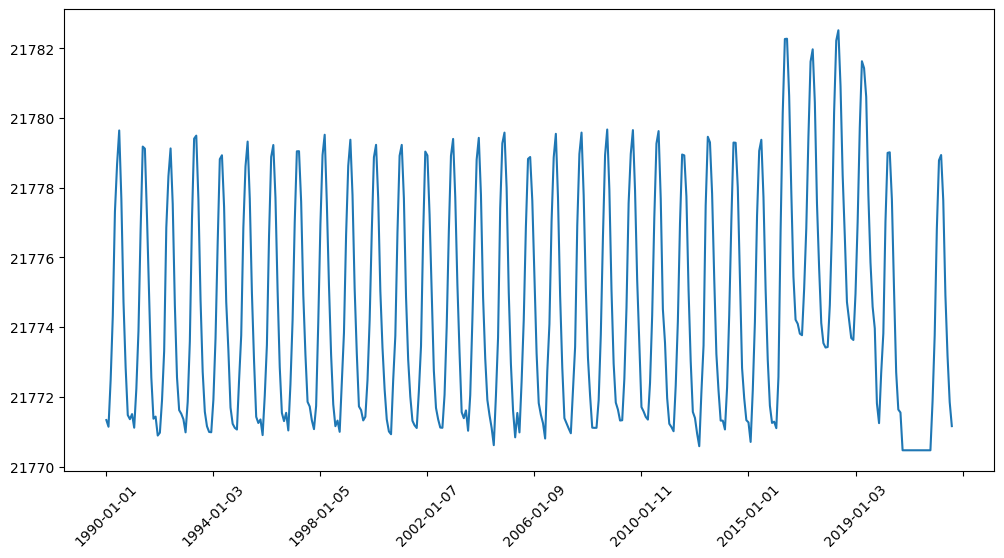

In [15]:
plt.figure(figsize = (12, 6))
monthly_df['aet'].plot()
plt.xticks(rotation = 45);

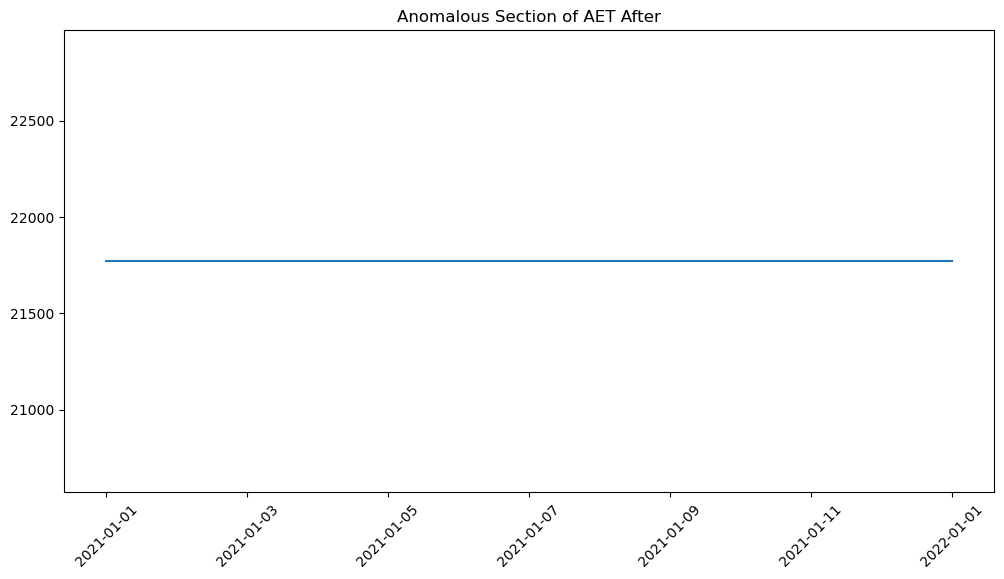

In [16]:
plt.figure(figsize = (12, 6))
monthly_df['aet'].loc['2021-01-01':'2022-01-01'].plot()
plt.xticks(rotation = 45);
plt.title('Anomalous Section of AET After');

The entire anomalous section has simply been turned into a straight line.

In [17]:
monthly_df['aet'].mean()

21774.568247465115

It appears that last observation carried forward simply set the np.nans to be the mean, which is not at all what I thought it was supposed to do. If I wanted to set this section to the mean I could've done that myself. I expected it to fill using trends in the previous data.

***Cleaning the `soil` column:***

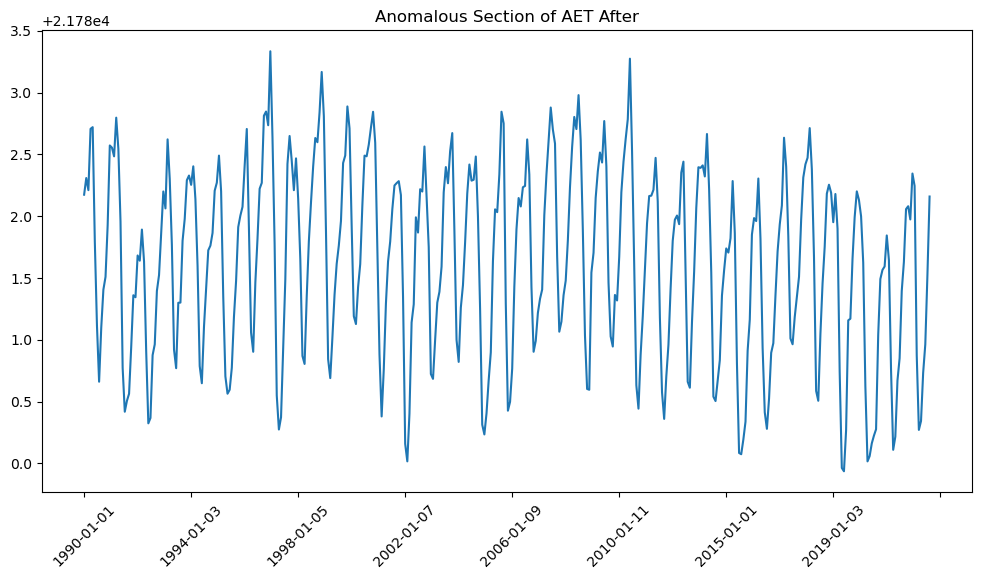

In [20]:
plt.figure(figsize = (12, 6))
monthly_df['soil'].plot()
plt.xticks(rotation = 45);
plt.title('Anomalous Section of AET After');

In [22]:
# no nulls are present in this column
monthly_df.soil.isna().sum()

0

Great, `soil` is ready to be made into a single feature timeseries forcast model.

In [19]:
monthly_df.to_csv('monthly_df_cleaned.csv', index_label = False)